# **Titanic Dataset Investigation**

How did different factors influence the likelihood of survival?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras import layers
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#read data into Pandas DataFrame and preview data
titanic = pd.read_csv('titanic_data.csv')
print(titanic.columns.values)
print(titanic)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
#remove irrelevant columns
titanic_cleaned = titanic.drop(labels=['PassengerId', 'Ticket', 'Embarked', 'Name', 'Cabin'], axis=1)
print(titanic_cleaned)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0           0       3    male  22.0      1      0   7.2500
1           1       1  female  38.0      1      0  71.2833
2           1       3  female  26.0      0      0   7.9250
3           1       1  female  35.0      1      0  53.1000
4           0       3    male  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0  13.0000
887         1       1  female  19.0      0      0  30.0000
888         0       3  female   NaN      1      2  23.4500
889         1       1    male  26.0      0      0  30.0000
890         0       3    male  32.0      0      0   7.7500

[891 rows x 7 columns]


In [ ]:
#fix data types
for i in range(len(titanic_cleaned)):
  sex = titanic_cleaned.iloc[i, 2]
  if sex == 'male':
    titanic_cleaned.iloc[i, 2] = int(1)
  else:
    titanic_cleaned.iloc[i, 2] = int(0)

print(titanic_cleaned)

     Survived  Pclass Sex   Age  SibSp  Parch     Fare
0           0       3   1  22.0      1      0   7.2500
1           1       1   0  38.0      1      0  71.2833
2           1       3   0  26.0      0      0   7.9250
3           1       1   0  35.0      1      0  53.1000
4           0       3   1  35.0      0      0   8.0500
..        ...     ...  ..   ...    ...    ...      ...
886         0       2   1  27.0      0      0  13.0000
887         1       1   0  19.0      0      0  30.0000
888         0       3   0   NaN      1      2  23.4500
889         1       1   1  26.0      0      0  30.0000
890         0       3   1  32.0      0      0   7.7500

[891 rows x 7 columns]


In [ ]:
#group data by survival status and take quick look at mean of all vs mean of each survival status
grouped = titanic_cleaned.groupby(by='Survived', as_index=False)

print(grouped.mean())
print(grouped['Sex'].apply(np.mean))
print()
print(titanic_cleaned.mean())

   Survived    Pclass        Age     SibSp     Parch       Fare
0         0  2.531876  30.626179  0.553734  0.329690  22.117887
1         1  1.950292  28.343690  0.473684  0.464912  48.395408
0    0.852459
1    0.318713
dtype: float64

Survived     0.383838
Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64


Conclusions


*   Most died (low overall 'Survived' mean)
*   85% of those who died were male; 32% of those who survived were male
*   Those who survived paid a higher fare than those who died
*   Those who survived were of higher average class than those who died



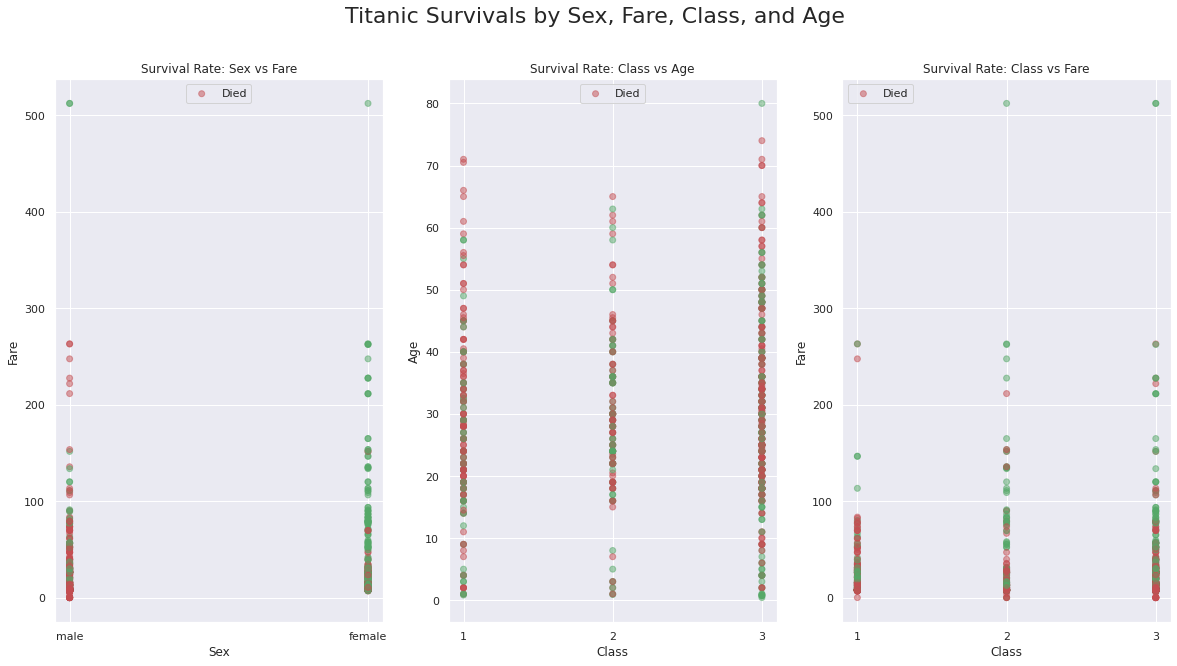

In [ ]:
# create scatterplot of factors, where red = died and green = survived
def num_to_color(num):
  if num == 0:
    return 'r'
  elif num == 1:
    return 'g'
  else:
    return 'k'

survivals = titanic_cleaned['Survived'].apply(num_to_color)

fig = plt.figure(figsize=(20,10), facecolor='w')
fig.suptitle("Titanic Survivals by Sex, Fare, Class, and Age", fontsize=22)

plt.subplot(1, 3, 1)
plt.scatter(titanic['Sex'], titanic_cleaned['Fare'], c=survivals, alpha=0.5, marker='o')
plt.title("Survival Rate: Sex vs Fare")
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.legend(['Died', 'Survived'], loc='upper center')

plt.subplot(1, 3, 2)
plt.scatter(titanic_cleaned['Pclass'].sort_values().apply(str), titanic_cleaned['Age'], c=survivals, alpha=0.5, marker='o')
plt.title("Survival Rate: Class vs Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.legend(['Died', 'Survived'], loc='upper center')

plt.subplot(1, 3, 3)
plt.scatter(titanic_cleaned['Pclass'].sort_values().apply(str), titanic_cleaned['Fare'], c=survivals, alpha=0.5, marker='o')
plt.title("Survival Rate: Class vs Fare")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.legend(['Died', 'Survived'], loc='upper left')

First Plot (Sex vs Fare)


*   Females overwhelmingly survived; males overwhelmingly died
*   Can be seen on female side: those who paid less died more

Second Plot (Class vs Age)

*   Most survivals in first class and most deaths in third class (second class in between)
*   Many survivals for younger people and many deaths for older people, regardless of class

Third Plot (Class vs Fare)

*   Those in first class paid significantly higher fare than those in second and third
*   Most survivals in first class

In [ ]:
# train scikit-learn logistic regression model to predict survival rate based on four factors (Class, Sex, Age, Fare)
data = titanic_cleaned.drop(['SibSp', 'Parch'], axis=1).dropna()

#normalize/interpolate data (make sex, class, age, fare between 0-1)
def normalize(series):
  return series / series.max()

norm_data = data.apply(normalize)
# 714 different datapoints (perform 85-15 split on data for training/testing)
print(len(norm_data))
cutoff = round(len(norm_data) * 0.8)

x_full = np.array(norm_data.drop('Survived', axis=1))
y_full = np.array(norm_data['Survived'])

x_train = np.array(norm_data.drop('Survived', axis=1)[:cutoff])
y_train = np.array(norm_data['Survived'][:cutoff])

x_test = np.array(norm_data.drop('Survived', axis=1)[cutoff:])
y_test = np.array(norm_data['Survived'][cutoff:])

clf = LogisticRegression()
clf.fit(x_train, y_train)

#test classifier accuracy
acc = clf.score(x_test, y_test)
print(acc)

#print model coefficients
print(clf.coef_)

714
0.8041958041958042
[[-2.9178267  -2.32047071 -1.50197706  0.14703485]]


Logistic Regression predicts whether a passenger survived with about 80% accuracy
 
Coefficient Analysis

*   Class played the second largest role in whether a person died; the higher the class number, the more likely a passenger died.
*   Sex played the biggest role in whether a person died or survived; the coefficient was -2.91, meaning that being a male made a passenger very likely to die.
*   Age and Fare had little impact on the survival of a passenger.




In [ ]:
# create TensorFlow neural network on Titanic data (see Python TF bookmark)

model = keras.Sequential(layers=[
  layers.Dense(8, activation='relu', input_shape=(4,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(2, activation='softmax')                                 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary()) #338 trainable parameters (weights and biases)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train the model
tf_x_train = np.asarray(x_full).astype(np.float32)
tf_y_train = np.asarray(y_full).astype(np.float32)
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
backend.clear_session()

history = model.fit(x=tf_x_train, y=tf_y_train,
                    epochs = EPOCHS,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[early_stop])



Epoch 1/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.4956 - val_loss: 0.6783 - val_accuracy: 0.7902
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.7548 - val_loss: 0.6614 - val_accuracy: 0.7902
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7566 - val_loss: 0.6478 - val_accuracy: 0.8042
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.7776 - val_loss: 0.6340 - val_accuracy: 0.8042
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.7776 - val_loss: 0.6187 - val_accuracy: 0.8042
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7776 - val_loss: 0.6017 - val_accuracy: 0.8042
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.7776 - val_loss: 0.5841 - val_accuracy: 0.8042
Epoch 

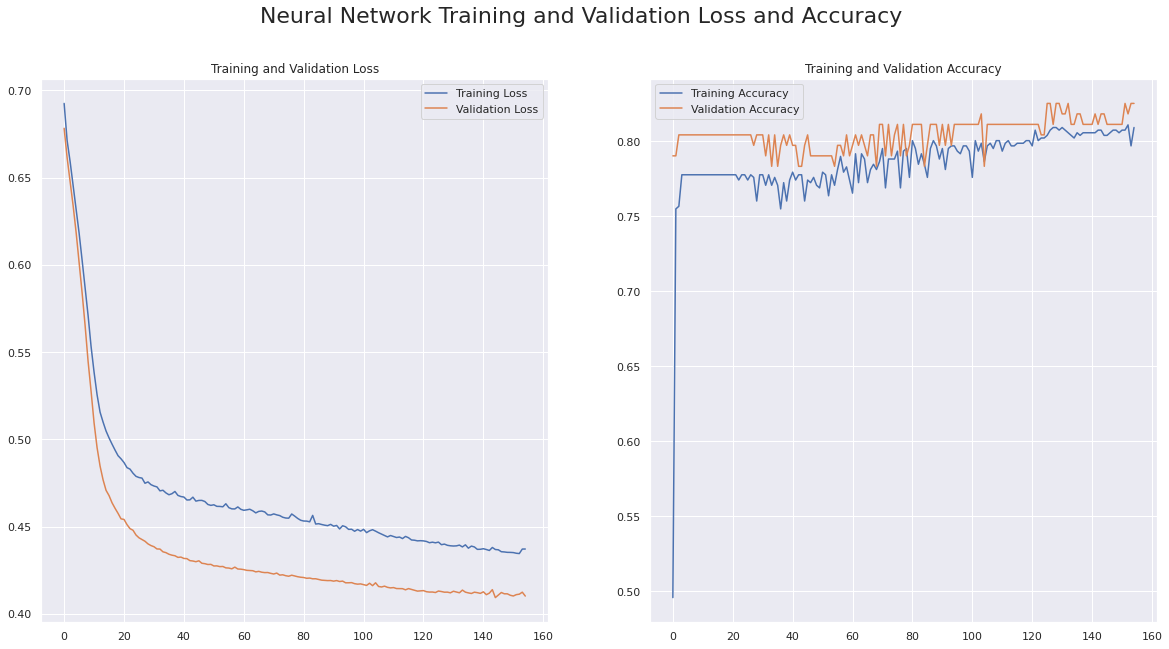

In [ ]:
# plot training and validation loss and accuracy

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

tf_fig = plt.figure(figsize=(20,10), facecolor='w')
tf_fig.suptitle("Neural Network Training and Validation Loss and Accuracy", fontsize=22)

plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Training and Validation Accuracy")
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')

Neural Network predicts whether a passenger will survive or die with about 83% accuracy



*   It is only slightly better than Logistic Regression
*   Not worth computational resources and complexity

